# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *MLPPlot.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,y, k, p, i):
    "Plots confusion matrix cm using label vector y" 
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix for X{}, k = {}, p = {}'.format(i,k,p))
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def try_p_k(X,y,p,k, i):
    "Tries a specific combination of p and k for dataset X"
    classifier = KNeighborsClassifier(n_neighbors = k, p = p)
    classifier.fit(X,y)
    y_pred = classifier.predict(X)
    cm = confusion_matrix(y, y_pred)
    plot_confusion_matrix(cm, y, k, p, i)
    return y_pred


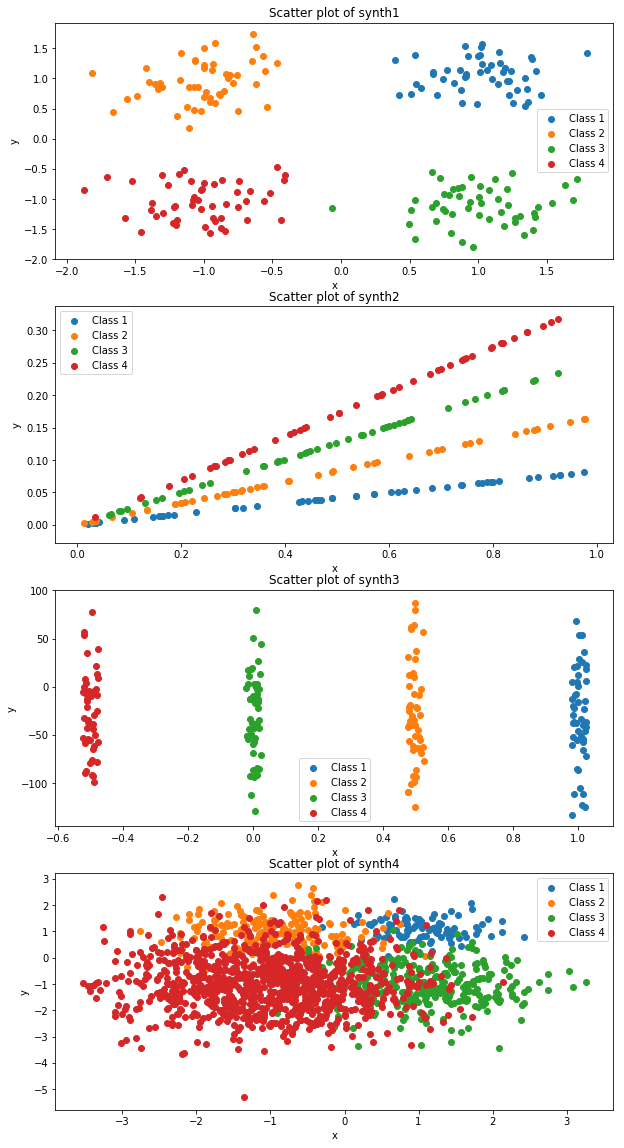

In [3]:
from scipy.io import loadmat
synth1 = loadmat("Data/synth1.mat")
X1 = synth1["X"]
y1 = synth1["y"].ravel()
cn_list = [x[0] for x in synth1["classNames"].ravel()] ## We assume all class names are the same.

synth2 = loadmat("Data/synth2.mat")
X2 = synth2["X"]
y2 = synth2["y"].ravel()

synth3 = loadmat("Data/synth3.mat")
X3 = synth3["X"]
y3 = synth3["y"].ravel()

synth4 = loadmat("Data/synth4.mat")
X4 = synth4["X"]
y4 = synth4["y"].ravel()

Xs = [X1, X2, X3, X4]
ys = [y1, y2, y3, y4]

fig, axes = plt.subplots(4, figsize = (10,20))
for i, axis in enumerate(axes):
    for j, cn in enumerate(cn_list):
        axis.scatter(Xs[i][ys[i]==j,0], Xs[i][ys[i]==j,1], label = cn)
    axis.set_title("Scatter plot of synth{}".format(i+1))
    axis.set_xlabel("x")
    axis.set_ylabel("y")
    axis.legend() 


In [4]:
def test_p_k():
    "Tests different values for p and k for each synthetic dataset."
    k_values = [2,3,5,10]
    p_values = [1,2]
    for i, X in enumerate(Xs):
        for p in p_values:
            for k in k_values:
                try_p_k(X,ys[i],p,k,i+1)
## Remove '#' in the line below to test. 
#test_p_k() 

### Results from testing, best values:
# X1: k=2/3, p=1 or k=2, p=2
# X2: k=2, p=2
# X3: k=2, p=1
# X4: k=3, p=1

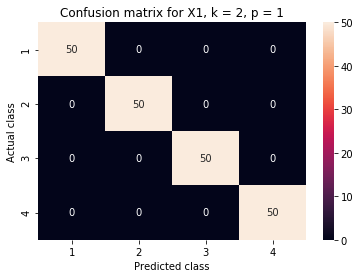

X1: 
Accuracy rate: 1.0
Error rate: 0.0


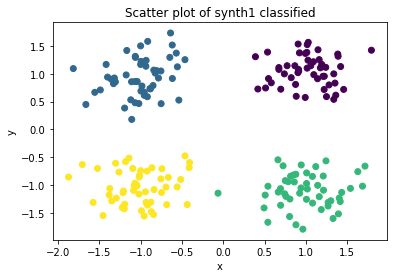

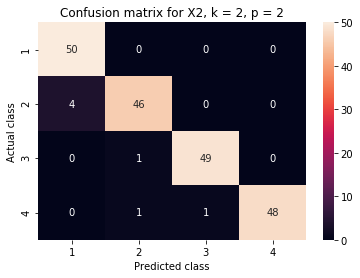

X2: 
Accuracy rate: 0.965
Error rate: 0.03500000000000003


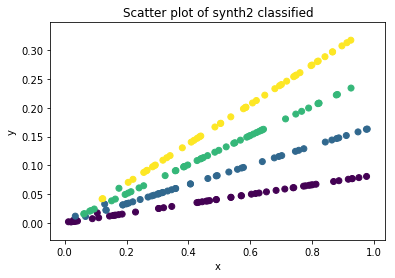

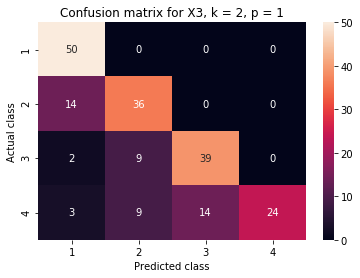

X3: 
Accuracy rate: 0.745
Error rate: 0.255


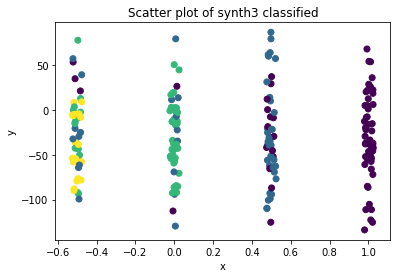

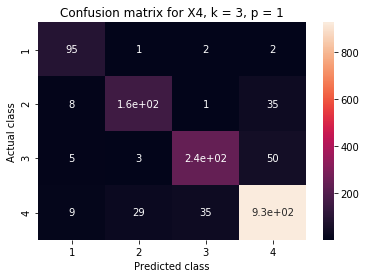

X4: 
Accuracy rate: 0.8875
Error rate: 0.11250000000000004


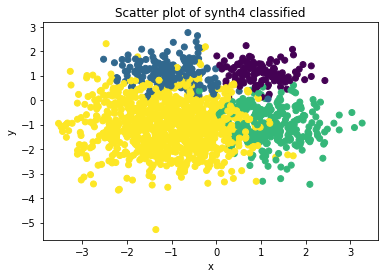

In [5]:
from sklearn.metrics import accuracy_score
p_k_values = [(1,2),(2,2),(1,2),(1,3)]

for i, X in enumerate(Xs):
    p, k = p_k_values[i] 
    y_pred = try_p_k(X,ys[i],p,k,i+1)
    plt.scatter(X[:,0], X[:,1], c = y_pred)    
    plt.title("Scatter plot of synth{} classified".format(i+1))
    plt.xlabel("x")
    plt.ylabel("y")
    acc = accuracy_score(ys[i],y_pred)
    err = 1-acc # by definition
    print("X{}: \nAccuracy rate: {}\nError rate: {}".format(i+1,acc,err))
    

### Answer for 6.1.1:
The best measures for each data set are:  
 - X1: k=2/3, p=1 or k=2, p=2  
 - X2: k=2, p=2  
 - X3: k=2, p=1  
 - X4: k=3, p=1  
 
X1 has well separated globular clusters. This makes it a relatively easy classification problem, which is why there are three sets of measures that give a perfect classification.  
X2 has data that is spread in a linear line, so a Euclidean distance measure makes sense, since data points on a linear line are closer together with Euclidean distance than with Manhattan distance. Using Manhattan distance, data points on another line could be equally close.    
X3 is best classified using the Manhattan distance measure. The data is not classified very well, which is caused partially by the big difference in scale, where the x values range from roughly -0.6 to 1.0, but the y values range from roughly -100 to 75.   
X4 is best classified using the Manhattan distance as well. This again makes sence since the shapes of the clusters are globular. The higher value for k makes sense because the clusters overlap, and therefore it's better to look at more neighbors.    
In general, very few neighbors were needed to classify the datasets. If datasets are well seperated, it's better to have a low value for k, which is also seen in the well seperated datasets (X1, X2 & X3). If datasets are overlapping, it's better to have a higher value for k, because this classifies the edge cases better. 

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

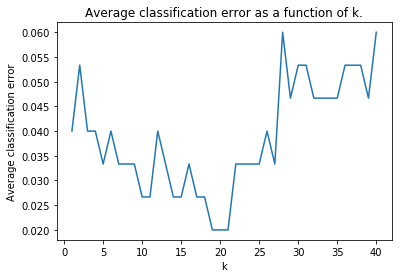

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
iris_data =pd.read_excel("Data/iris.xls") 
iris_data = iris_data.values
X = iris_data[:,:4]
y = iris_data[:,4]
K = list(range(1,41))
class_errors = []
loo = LeaveOneOut()
for k in K:
    local_class_errors = []
    classifier = KNeighborsClassifier(n_neighbors = k, p = 2)
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier.fit(X_train,y_train)
        accuracy = classifier.score(X_test, y_test)
        local_class_errors.append(1-accuracy)
    class_errors.append(np.mean(local_class_errors))
    
plt.plot(K, class_errors)    
plt.title("Average classification error as a function of k.")
plt.xlabel("k")
plt.ylabel("Average classification error")
plt.show()

### Answer for 6.1.2:
The optimal number of neighbours is the k-value which gives the lowest average classification error. From the plot we can read that this is around k = 20. 

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

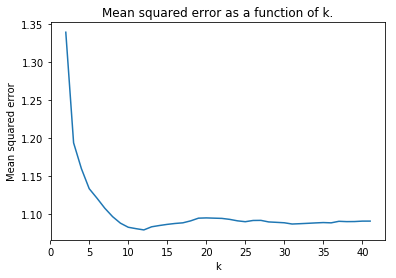

In [7]:
from sklearn.neighbors import NearestNeighbors
wine_data = loadmat("Data/wine.mat")['X']
X = np.delete(wine_data, 10, axis = 1)
alcohol= wine_data[:,10]
nn = NearestNeighbors()
nn.fit(X)
K = list(range(2,42)) # because kneighbors returns the object itself as well, which we want to disregard.
mses = []
for k in K:
    dist,ind = nn.kneighbors(X, k)
    alcohol_neighbors = np.delete(alcohol[ind], 0, axis = 1)
    alcohol_pred = np.mean(alcohol_neighbors, axis = 1)
    mses.append((np.square(alcohol_pred - alcohol)).mean())
plt.plot(K, mses)    
plt.title("Mean squared error as a function of k.")
plt.xlabel("k")
plt.ylabel("Mean squared error")
plt.show()

### Answer for 6.1.3:
The optimal k-value is the value where the mean squared error is the lowest. From the plot we can see that the k-value with the lowest mean squared error is roughly 12.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

The MLP has an accuracy of 1.0.


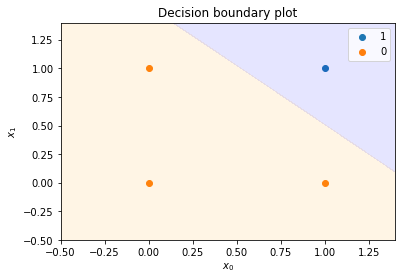

In [8]:
from sklearn.neural_network import MLPClassifier
from Toolbox.MLPPlot import MLPPlot
Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1])
mlp_test = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1,))
mlp_test.fit(Xtest, ytest)
accuracy = mlp_test.score(Xtest, ytest)
print("The MLP has an accuracy of {}.".format(accuracy))
plot = MLPPlot(Xtest,ytest,mlp_test)
plot.plot_boundaries()

### Answer for 6.2.1:
1) If the activation function of the MLP is linear, that essentially makes the MLP a single input $\rightarrow$ output perceptron with a combined weight matrix equal to $Wo*Wh$.  
2)  
- **hidden_layer_sizes**: The bigger the hidden layer size is, the more distinguished the representations can be. Too few hidden nodes means that the MLP can't learn enough, but too many hidden nodes can mean the MLP learns a one-to-one mapping, which is not a meaningful representation.  
- **max_iter**: If the maximum number of iterations is too low, it's possible that the perceptron has not converged yet and the solution won't be ideal. If the maximum number of iterations is high, the learning process might be a lot longer, but the perceptron has had more time to converge. 
- **learning_rate**: There are three options for the kind of learning rate: *constant*, *invscaling* and *adaptive*. The constant learning rate is self explanatory, the invscaling learning rate gets lower every step and the adaptive learning rate is lowered when the training error does not improve anymore. Using the constant learning rate is fast but might be less accurate since the update step might be big and could shoot past minima. The invscaling might be more accurate, since the update steps become smaller every iteration, but that means the learning process might take more time. The adaptive learning rate is a compromise between the two, where it only decreases the learning rate when it needs to, i.e. when the training error no longer improves. 
- **learning_rate_init**: Similarly to the explanation above, starting with a high learning rate can make the perceptron converge faster, but it might also overshoot the minimum. Starting with a lower learning rate could mean that it's easy to get stuck in a local mininum or that convergence takes a very long time.  

3) *We assume that you mean using 1 hidden unit, and not one hidden layer, since both are stated but the latter makes more sense with the question.* The perceptron either performs with accuracy 1 or 0.75, so it performs reasonably well. The accuracy would improve when using more hidden units, since now all information from the input is condensed into just a single hidden unit. 

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y`. How are `X` and `y` related?

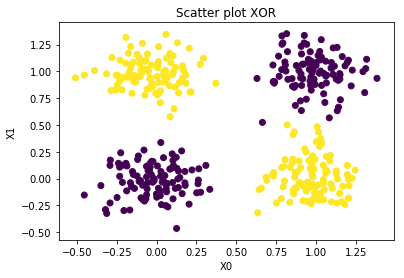

In [9]:
xor_data = loadmat("Data/xor.mat")
X = xor_data['X']
y = xor_data['y'].ravel()
plt.scatter(X[:,0],X[:,1], c = y)
plt.title("Scatter plot XOR")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### Answer for 6.2.2:
If we regard the data set as an XOR problem, the two yellow clusters should be classified as true and the brown clusters should be classified as false. If the X0 value is higher than 0.50, the X0 value is seen as true, and idem dito for the X1 value. On those two, now binary values, the XOR valuation is applied to determine the cluster. 


#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

Best training error: 0.18055555555555558
Best test error:0.0
Best training error: 0.17222222222222228
Best test error:0.025000000000000022
Best training error: 0.2861111111111111
Best test error:0.025000000000000022
Best training error: 0.2777777777777778
Best test error:0.0
Best training error: 0.1694444444444444
Best test error:0.0
Best training error: 0.1777777777777778
Best test error:0.0
Best training error: 0.18055555555555558
Best test error:0.0
Best training error: 0.2222222222222222
Best test error:0.0
Best training error: 0.16666666666666663
Best test error:0.0
Best training error: 0.16666666666666663
Best test error:1.0


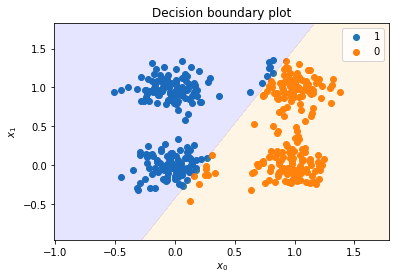

In [13]:
from sklearn.model_selection import KFold
mlp1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1,))
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_train_error = 1.0
    best_test_error = 1.0
    for i in range(5):
        mlp1.fit(X_train, y_train)
        train_error = 1 - mlp1.score(X_train, y_train)
        test_error = 1 - mlp1.score(X_test, y_test)
        if (train_error < best_train_error):
            best_train_error = train_error
        if (test_error < best_test_error):
            best_test_error = test_error
    print("Best training error: {}\nBest test error:{}".format(best_train_error, best_test_error))
mlp1.fit(X,y)
plot = MLPPlot(X,y,mlp1)
plot.plot_boundaries()

### Answer for 6.2.3:
When we plot the decision boundaries of the network trained on the entire dataset, we can see that it performs very poorly. This is due to the fact that one hidden unit is not enough to learn the XOR problem, since it's not linearly separable. When looking at the errors of the 10-fold cross validation, we see that there are instances with a best test error of 0, meaning perfect classification. However, this is only due to the fact that the test is only a tenth of the data points, and it is likely that one of the clusters is not represented in the test set, making the test set linearly separable. 


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

Best training error: 0.17222222222222228
Best test error:0.0
Best training error: 0.002777777777777768
Best test error:0.025000000000000022
Best training error: 0.2222222222222222
Best test error:0.0
Best training error: 0.17222222222222228
Best test error:0.0
Best training error: 0.01388888888888884
Best test error:0.0
Best training error: 0.011111111111111072
Best test error:0.0
Best training error: 0.019444444444444486
Best test error:0.0
Best training error: 0.01388888888888884
Best test error:0.0
Best training error: 0.002777777777777768
Best test error:0.07499999999999996
Best training error: 0.002777777777777768
Best test error:0.0


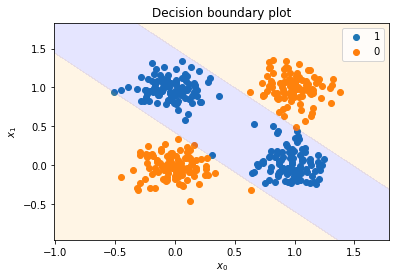

In [14]:
mlp2 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2,))
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_train_error = 1.0
    best_test_error = 1.0
    for i in range(5):
        mlp2.fit(X_train, y_train)
        train_error = 1 - mlp2.score(X_train, y_train)
        test_error = 1 - mlp2.score(X_test, y_test)
        if (train_error < best_train_error):
            best_train_error = train_error
        if (test_error < best_test_error):
            best_test_error = test_error
    print("Best training error: {}\nBest test error:{}".format(best_train_error, best_test_error))
mlp2.fit(X,y)
plot = MLPPlot(X,y,mlp2)
plot.plot_boundaries()

### Answer for 6.2.4:
We see that the network trained on the whole dataset now classifies the data almost perfectly. Also, the 10-fold cross validation shows much better and more consistent results, where both training and testing error are both quite low. This is because with two hidden units, non-linearly separable problems like the XOR problem, are solvable.

#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.025000000000000022
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0
Best training error: 0.0
Best test error:0.0


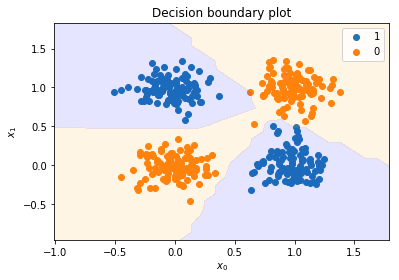

In [12]:
mlp10 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,))
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_train_error = 1.0
    best_test_error = 1.0
    for i in range(5):
        mlp10.fit(X_train, y_train)
        train_error = 1 - mlp10.score(X_train, y_train)
        test_error = 1 - mlp10.score(X_test, y_test)
        if (train_error < best_train_error):
            best_train_error = train_error
        if (test_error < best_test_error):
            best_test_error = test_error
    print("Best training error: {}\nBest test error:{}".format(best_train_error, best_test_error))
mlp10.fit(X,y)
plot = MLPPlot(X,y,mlp10)
plot.plot_boundaries()

### Answer for 6.2.5:
Both the training and the test error are extremely low. The test error was already low with 2 hidden units, which means that this is not a very big improvement. The lower training error might mean that the classifier is overfitting. This is also visible in the decision boundaries, which does not resemble the XOR problem anymore. Instead, the boundaries go out of their way to perfectly fit the training data. Overall, this means that using 10 hidden units does not really show an improvement. 
